In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/output/autorenew_limpio.csv')

In [4]:
data

,name,price,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,fuelType,brand,notRepairedDamage
0,quad_neu_t?v_tauschen_gegen_Auto,1700,desconocido,3200,desconocido,NaN,5000,desconocido,others,NaN
1,Opel_GT_Karosserie_mit_Brief!,700,desconocido,9999,desconocido,NaN,10000,desconocido,opel,NaN
2,Reo_Vorkriegs_Oldtimer_Rennwagen_1928,6500,desconocido,8888,desconocido,NaN,10000,desconocido,others,NaN
3,Renault_Twingo,300,desconocido,2200,desconocido,NaN,5000,desconocido,renault,NaN
4,Kompressor,1600,desconocido,4100,desconocido,NaN,5000,desconocido,others,NaN
...,...,...,...,...,...,...,...,...,...,...
76,RENNWAGEN_GRUPPE_F,15000,desconocido,5000,desconocido,153.0,5000,petrol,volkswagen,NaN
77,Chevrolet_Camaro_Z28_Cabrio,25500,desconocido,5000,manually,424.0,5000,desconocido,chevrolet,NaN
78,Golf_1_75ps_5911km_Original_Automatik,7999,desconocido,5911,automatic,74.0,10000,desconocido,volkswagen,NaN
79,Mazda_6_GH__2008_Alufelgen_mit_Brereifung,450,desconocido,2500,desconocido,NaN,5000,desconocido,mazda,NaN


Vehiculos sin daños

In [6]:
df = data[data['notRepairedDamage'] == 'no'].copy()

In [7]:
df

,name,price,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,fuelType,brand,notRepairedDamage
13,Yamaha_Raptor_660R_Limited_Edition___Spezialau...,4900,desconocido,6000,manually,51.0,10000,petrol,others,no
17,Vw_Golf_1_2.0_16V_ABF_Turbo_Umbau_Selten_1A_H&...,12000,desconocido,4000,manually,493.0,5000,desconocido,volkswagen,no
20,Subaru_Impreza_GT,9000,desconocido,5000,manually,414.0,5000,petrol,subaru,no
27,Yamaha_Raptor_660R_Limited_Edition___Spezialau...,4900,desconocido,6000,manually,51.0,10000,petrol,others,no
30,Vito_touret_119_Blue_Tec,42800,desconocido,6200,automatic,NaN,10000,diesel,mercedes_benz,no
46,BMW_320i_Jahreswagen,33900,desconocido,9000,desconocido,NaN,10000,desconocido,bmw,no
50,3x_BMW_E36_Coupe_316i_alle_zusammen_fuer_850_E...,850,desconocido,9999,desconocido,NaN,10000,desconocido,bmw,no
66,M_klasse__mercedes,8700,desconocido,4500,desconocido,94.0,5000,desconocido,mercedes_benz,no
80,Vw_Golf_1_16v_Turbo,12000,desconocido,4000,desconocido,493.0,5000,desconocido,volkswagen,no


In [8]:
df.drop(columns=['notRepairedDamage'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 13 to 80
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                9 non-null      object 
 1   price               9 non-null      int64  
 2   vehicleType         9 non-null      object 
 3   yearOfRegistration  9 non-null      int64  
 4   gearbox             9 non-null      object 
 5   powerCV             6 non-null      float64
 6   kilometer           9 non-null      int64  
 7   fuelType            9 non-null      object 
 8   brand               9 non-null      object 
dtypes: float64(1), int64(3), object(5)
memory usage: 720.0+ bytes


In [17]:
df.isnull().mean().round(4) * 100

name                  0.0
price                 0.0
vehicleType           0.0
yearOfRegistration    0.0
gearbox               0.0
powerCV               0.0
kilometer             0.0
fuelType              0.0
brand                 0.0
dtype: float64

In [16]:
df.dropna(inplace=True)

In [18]:
df.columns

Index(['name', 'price', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerCV', 'kilometer', 'fuelType', 'brand'],
      dtype='object')

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,6.0,8583.333333,3183.342059,4900.0,5850.00,8850.0,11250.00,12000.0
yearOfRegistration,6.0,4916.666667,917.423930,4000.0,4125.00,4750.0,5750.00,6000.0
powerCV,6.0,266.000000,222.259308,51.0,61.75,254.0,473.25,493.0
kilometer,6.0,6666.666667,2581.988897,5000.0,5000.00,5000.0,8750.00,10000.0


In [23]:
df.describe(include=['object']).T

,count,unique,top,freq
name,6,6,Yamaha_Raptor_660R_Limited_Edition___Spezialau...,1
vehicleType,6,1,desconocido,6
gearbox,6,2,manually,4
fuelType,6,2,petrol,3
brand,6,4,others,2


Visualizaciones

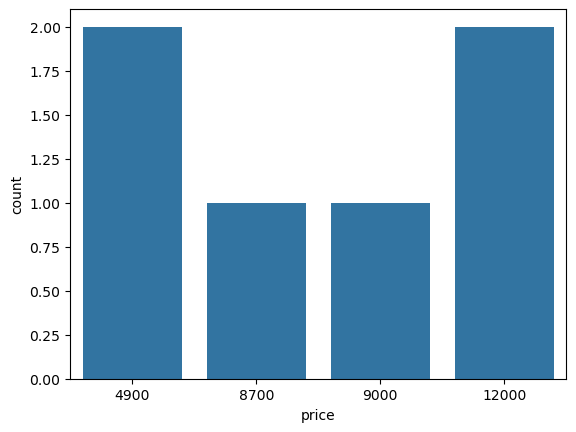

In [27]:
    plt.figure()
    sns.countplot(x='price', data=df)
    plt.show()

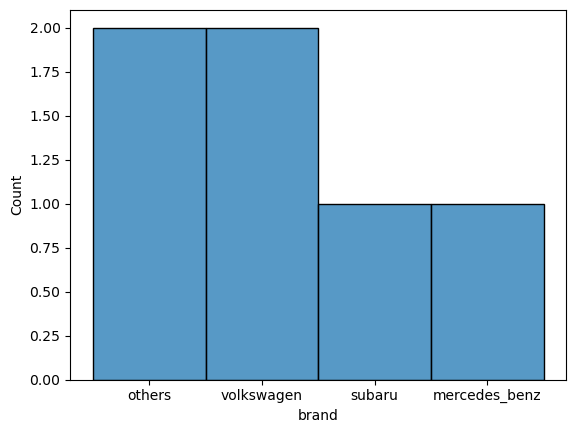

In [29]:
    plt.figure()
    sns.histplot(df['brand'],bins=20)
    plt.show()

Relaciones cruzdas

In [30]:
df.columns

Index(['name', 'price', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerCV', 'kilometer', 'fuelType', 'brand'],
      dtype='object')

In [42]:
col_num = 'price'
columnas_numericas = df.select_dtypes(include='number').columns.tolist()
columnas_numericas
col_cat = 'fuelType'

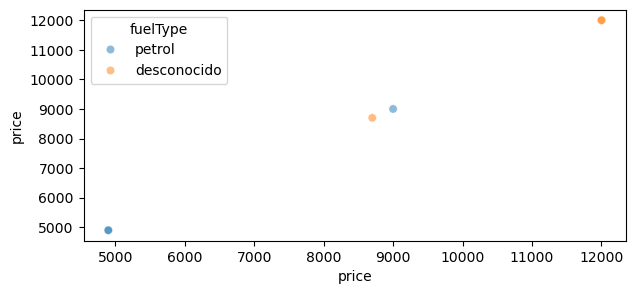

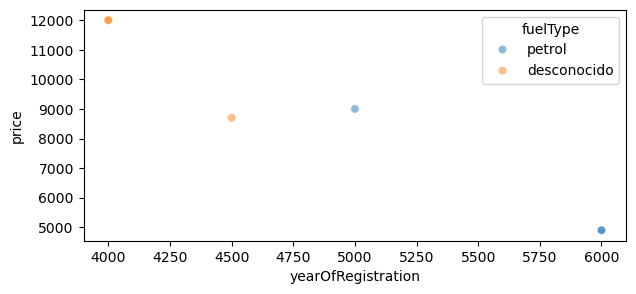

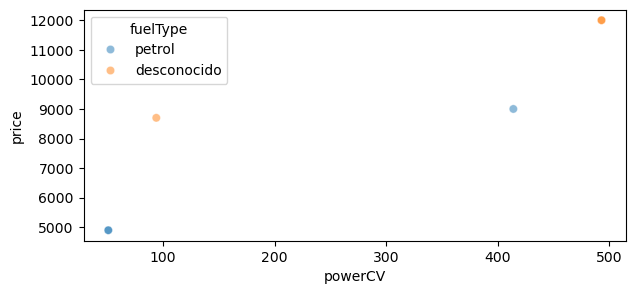

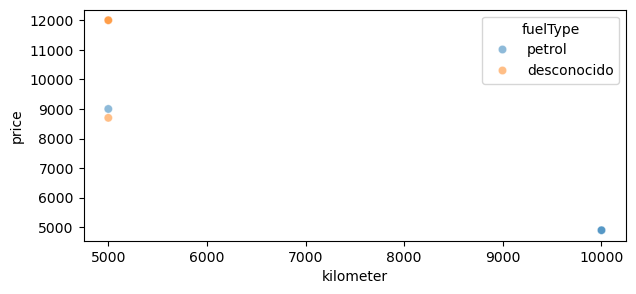

In [43]:
for col in columnas_numericas:
    plt.figure(figsize=(7,3))
    sns.scatterplot(x=col,y=col_num,data=df,hue=col_cat,alpha=0.5)
    plt.show()